# Bike RNN

Build an RNN model with bike data and use weekday and hour information to predict the number of bike.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bike_rnn.csv')
df

,num,weekday,hour
0,0,5,17
1,1,5,17
2,1,5,17
3,2,5,17
4,4,5,17
...,...,...,...
45944,6,2,15
45945,6,2,15
45946,6,2,15
45947,6,2,15


In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
# Normalization: The MinMaxScaler scales the weekday and hour features to the range [0, 1] to improve model performance.
scaler = MinMaxScaler()
df[['weekday', 'hour']] = scaler.fit_transform(df[['weekday', 'hour']])

In [7]:
X = df[['weekday', 'hour']].values
y = df['num'].values

In [8]:
# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1]) # 1 timestep since each row is independent

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\maohi\master-degree\learn_ai\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 80.5928 - mae: 6.3610 - val_loss: 58.0719 - val_mae: 6.3070
Epoch 2/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 59.0790 - mae: 6.2355 - val_loss: 55.8735 - val_mae: 6.0902
Epoch 3/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 56.8151 - mae: 6.0987 - val_loss: 55.3227 - val_mae: 6.0102
Epoch 4/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 56.7181 - mae: 6.0903 - val_loss: 54.7822 - val_mae: 5.9171
Epoch 5/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 55.2594 - mae: 5.9758 - val_loss: 54.2440 - val_mae: 6.0047
Epoch 6/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 54.6756 - mae: 5.9483 - val_loss: 53.7934 - val_mae: 5.9474
Epoch 7/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 54.3980 - mae: 5.9377 - val_loss: 53.4380 - val_mae: 5.9005
Epoch 8/50
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 53.7430 - mae: 5.9105 - val_loss: 53.1495 - val_mae: 5.8495
Epoch 9/50
1149/1

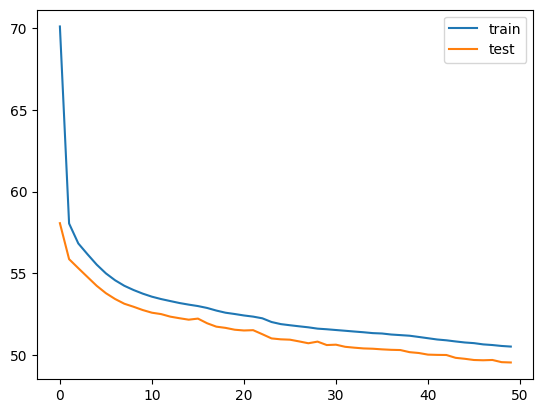

In [13]:
# Plot the loss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [14]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Mean Absolute Error: {mae}')

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.2127 - mae: 5.6452
Test Loss: 49.55956268310547, Test Mean Absolute Error: 5.708705425262451


In [15]:
predictions = model.predict(X_test)
for i in range(5):
    print(f'Actual: {y_test[i]}, Predicted: {predictions[i][0]}')

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Actual: 3, Predicted: 5.476264953613281
Actual: 1, Predicted: 9.290060997009277
Actual: 26, Predicted: 12.717727661132812
Actual: 3, Predicted: 11.384896278381348
Actual: 1, Predicted: 6.13854455947876


In [16]:
model.save('bike_rnn_50_epochs.h5')